# Problem 1

In [2]:
import pandas as pd
import numpy as np
from matplotlib.mlab import PCA
import matplotlib.pyplot as plt
#import os
#for csvfile in "red", "grn", "nir", "hough":
#    os.system("wget http://www.sdss.jhu.edu/~szalay/class/2017/data/"+csvfile+".csv")

In [3]:
# loading data
r='/home/idies/workspace/persistent/AS.171.205/HW5/red.csv'
g='/home/idies/workspace/persistent/AS.171.205/HW5/grn.csv'
n='/home/idies/workspace/persistent/AS.171.205/HW5/nir.csv'
dfr=pd.read_csv(r,header = None)
dfg=pd.read_csv(g,header = None)
dfn=pd.read_csv(n,header = None)

# converting dataframe to np array.
red=dfr.as_matrix()
grn=dfg.as_matrix()
nir=dfn.as_matrix()


# turn matrices into 1-D vectors.
red1=red.flatten()
grn1=grn.flatten()
nir1=nir.flatten()

In [4]:
# concatenate vectors into a matrix.
mat=np.column_stack((red1,grn1,nir1))
mat

array([[ 0.23529,  0.2    ,  0.23137],
       [ 0.21569,  0.18431,  0.21569],
       [ 0.18431,  0.16471,  0.25098],
       ..., 
       [ 0.22353,  0.18431,  0.25882],
       [ 0.21961,  0.18431,  0.27843],
       [ 0.20392,  0.18039,  0.2549 ]])

Perform PCA.

In [5]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(mat)
df_std

array([[ 0.23019861,  0.44466687, -0.10960027],
       [-0.11904778, -0.02224211, -0.31809644],
       [-0.67819838, -0.60550634,  0.1511529 ],
       ..., 
       [ 0.02065078, -0.02224211,  0.25540098],
       [-0.0491985 , -0.02224211,  0.51615416],
       [-0.3287738 , -0.13889495,  0.20327694]])

In [6]:
covmat = np.cov(df_std.T)
eigenvalues, eigenvectors = np.linalg.eig(covmat)

In [7]:
eigenvalues

array([ 1.99925923,  0.03221529,  0.96853692])

In [8]:
eigenvectors

array([[-0.69364605, -0.70430627, -0.15102265],
       [-0.69798031,  0.70900431, -0.10067953],
       [-0.17798494, -0.03557488,  0.98338995]])

Find a, b, c values according to eigenvectors. Reshape into 512*512 images.

In [9]:
a = mat * eigenvectors[0]
a = np.hsplit(a,3)
a1 = np.reshape(a[0],(512,512))
a2 = np.reshape(a[1],(512,512))
a3 = np.reshape(a[2],(512,512))

In [10]:
b = mat * eigenvectors[1]
b = np.hsplit(b,3)
b1 = np.reshape(b[0],(512,512))
b2 = np.reshape(b[1],(512,512))
b3 = np.reshape(b[2],(512,512))

In [11]:
c = mat * eigenvectors[2]
c = np.hsplit(c,3)
c1 = np.reshape(c[0],(512,512))
c2 = np.reshape(c[1],(512,512))
c3 = np.reshape(c[2],(512,512))

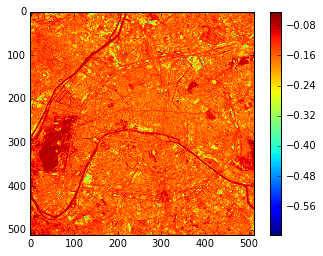

In [12]:
plt.imshow(b1);
plt.colorbar()
plt.show()

After playing around with some different cuts, I settled on the following two.

Part a: Showing the parks. The red is the parks.

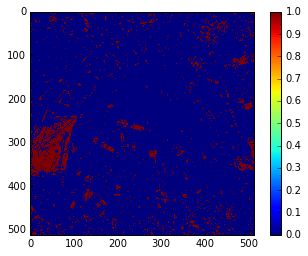

In [18]:
plt.imshow(c3 > 0.34);
plt.colorbar()
plt.show()

Part b: Showing the River. The blue is the river.

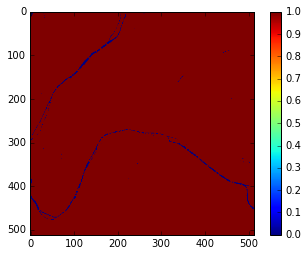

In [15]:
plt.imshow(a3 < -0.01);
plt.colorbar()
plt.show()